Pandas Tutorial
========
In this notebook i will cover the basics of pandas. We first start by imprting pandas

In [64]:
import pandas as pd
import numpy as np
import random
%matplotlib inline

There are two types of data structures in pandas.
* DataFrame
* Series

The next code snippet shows how to create a pandas object

In [12]:
years = pd.Series(np.array(range(2000, 2010)))
years

This is an example to create a pandas dataframe. We will use the random library to genrate random numbers

In [24]:
random.seed(100)
Store_1 = [random.randint(500,1000) for i in range(10)]
Store_2 = [random.randint(500,1000) for i in range(10)]

Now that we have made the lists. We willl make the dataframes from the list objects

In [30]:
sales = pd.DataFrame({'year':years, 'Store_1':Store_1, 'Store_2':Store_2})

### Selecting Columns of a dataframe


In [40]:
sales['Store_1'] # Selects only the Store_1 column
sales[['Store_1','Store_2']] # Selects multiple column by passing a list

,Store_1,Store_2
0,572,523
1,727,967
2,886,974
3,853,668
4,866,655
5,717,884
6,900,602
7,766,589
8,540,594
9,728,673


###  Selecting rows of a dataframe.

In [41]:
sales.loc[:5] # Filter based on index values
# sales.iloc[:5] # Filer based on row numbers

,Store_1,Store_2,year
0,572,523,2000
1,727,967,2001
2,886,974,2002
3,853,668,2003
4,866,655,2004
5,717,884,2005


## Filtering

In [44]:
sales_500 = sales[sales['Store_1'] > 600]

### Handling missing values

In [53]:
_2016 = pd.DataFrame([[653, 867, None]], columns=sales.columns)

# Ignore_index = True makes the new addition as new index (10), False will make the new index as  0
sales = sales.append(_2016, ignore_index=True) 

In [56]:
nulls = sales.isnull()
nulls

,Store_1,Store_2,year
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


### Handling missing values in pandas

In [61]:
drop_na = sales.dropna() # removes all rows that have missing values
drop_na_all = sales.dropna(how='all') # removes the row only if it has all values missing
fillna_ffill = sales.fillna(method='ffill') # Imputes mussing values with foeward fill method

### The indexes

In [62]:
sales = sales.set_index('year') # Makes the year column as the index

### Transposing the dataframe
* data.stack()
* data.unstack()
* data.pivot()

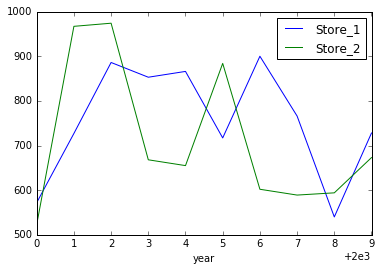

In [70]:
sales.plot() # We see that the indexes are not  properly labelled and are not in year format.

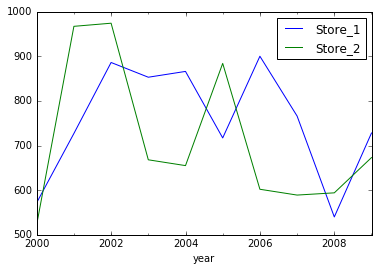

In [81]:
# You cannot name as sales.index in python, so the indexes are saved in sales index
sales.index = pd.to_datetime(sales.index, format='%Y')
sales.plot()

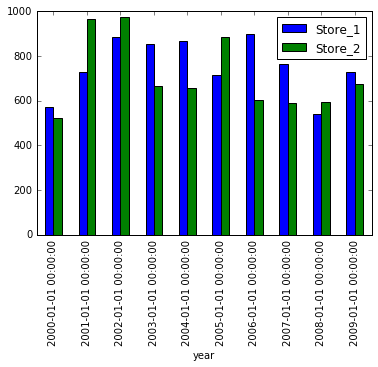

In [82]:
sales.plot(kind = 'bar') # for making the bar plot

### Advanced plottiing

1. Using Vincent

In [85]:
import vincent
vincent.core.initialize_notebook()

In [88]:
# Line chart on vincent

bar = vincent.Line(sales)
bar.display()

AttributeError: 'Line' object has no attribute 'update_vis'

In [89]:
# Area Chart on vincent

area = vincent.Area(sales)
area.display()

#### Bokeh plotting library

In [94]:
from bokeh import charts
charts.Line(sales, xscale = 'datetime', filename = "bokeh.html").show()

Wrote bokeh.html


### Doing some analysis on real world data

In [104]:
mildata = pd.read_excel('SIPRI Milex data 1988-2013 plus.xlsx', sheetname='Current USD',
                        skiprows=5, na_values=['. .', 'xxx'], skip_footer=7)

In [106]:
# Check rows in the data frame
print mildata.shape

(186, 28)


In [107]:
mildata.head()

,Country,Notes,1988,1989,1990,1991,1992,1993,1994,1995,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,1,1029,854,904,565,1053,1277,1335,1235,...,2802,2925,3094,3946,5172,5281,5671,8652,9326,10402
3,Libya,‡ ¶ 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,685,691,614,639,1100,NaN,NaN,NaN,2991,NaN
4,Morocco,3,917,991,1070,1148,1229,1252,1365,1438,...,1938,2030,2134,2408,2945,3055,3161,3343,3402,4064


In [116]:
newmil = mildata.dropna(inplace = False, how = 'all', subset=mildata.columns[mildata.columns != u'Country'])

In [117]:
newmil.head(10)

,Country,Notes,1988,1989,1990,1991,1992,1993,1994,1995,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
2,Algeria,1,1029.0,854.0,904.0,565.0,1053.0,1277.0,1335.0,1235.0,...,2802.0,2925.0,3094.0,3946.0,5172.0,5281,5671,8652,9326.0,10402.0
3,Libya,‡ ¶ 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,685.0,691.0,614.0,639.0,1100.0,NaN,NaN,NaN,2991.0,NaN
4,Morocco,3,917.0,991.0,1070.0,1148.0,1229.0,1252.0,1365.0,1438.0,...,1938.0,2030.0,2134.0,2408.0,2945.0,3055,3161,3343,3402.0,4064.0
5,Tunisia,NaN,233.0,234.0,248.0,260.0,290.0,276.0,297.0,343.0,...,445.0,468.0,497.0,491.0,579.0,565,571,715,814.0,948.0
7,Angola,‖ 4,NaN,NaN,NaN,1033.0,794.0,1774.0,NaN,234.0,...,818.0,1365.0,1970.0,2032.0,3164.0,3311,3501,3647,4145.0,6095.0
8,Benin,NaN,36.9,28.5,32.8,NaN,NaN,NaN,NaN,NaN,...,41.8,44.7,46.8,NaN,64.7,NaN,NaN,NaN,78.2,86.0
9,Botswana,NaN,93.7,103.0,156.0,172.0,178.0,186.0,170.0,166.0,...,314.0,284.0,273.0,306.0,332.0,330,349,370,333.0,298.0
10,Burkina Faso,†,47.0,55.2,69.8,57.4,58.6,49.8,25.0,30.5,...,57.3,63.8,70.9,95.2,123.0,110,124,139,146.0,163.0
11,Burundi,‡ 5,34.3,37.9,39.6,42.8,39.0,36.3,41.9,42.1,...,44.9,49.6,44.7,46.3,43.9,NaN,NaN,NaN,59.0,60.8
12,Cameroon,§,154.0,147.0,181.0,178.0,184.0,168.0,94.5,114.0,...,221.0,223.0,257.0,297.0,347.0,343,354,347,354.0,393.0


In [120]:
newmil[newmil['Country'] == 'USA']

,Country,Notes,1988,1989,1990,1991,1992,1993,1994,1995,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013


In [121]:
# Stripping all the white spaces in the country names
newmil['Country'] = newmil['Country'].apply(lambda x: x.strip())

C:\Users\rarroyave\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [122]:
newmil[newmil['Country'] == 'USA']

,Country,Notes,1988,1989,1990,1991,1992,1993,1994,1995,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
71,USA,36,293093,304085,306170,280292,305141,297637,288059,278856,...,464676,503353,527660,556961,621131,668567,698180,711338,684780,640221


In [136]:
subframe = newmil[(newmil['Country'] == 'USA') | (newmil['Country'] == 'Sweden')]
del subframe['Notes']

In [137]:
subframe.head()

,Country,1988,1989,1990,1991,1992,1993,1994,1995,1996,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
71,USA,293093,304085,306170,280292,305141,297637,288059,278856,271417,...,464676,503353,527660,556961,621131,668567,698180,711338,684780,640221
163,Sweden,4918,5033,6169,6219,6419,5011,5154,5730,6203,...,5515,5518,5577,6386,6025,5063,5886,6324,6239,6519


In [138]:
subframe.set_index('Country', inplace=True)
subframe.head()

,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
USA,293093,304085,306170,280292,305141,297637,288059,278856,271417,276324,...,464676,503353,527660,556961,621131,668567,698180,711338,684780,640221
Sweden,4918,5033,6169,6219,6419,5011,5154,5730,6203,5203,...,5515,5518,5577,6386,6025,5063,5886,6324,6239,6519


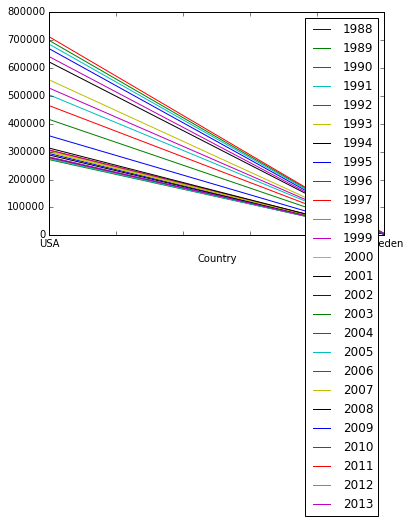

In [139]:
subframe.plot()

The above plot doesn't make any sense as the data is not transposed. We can transpose the data by the 'T' method. 

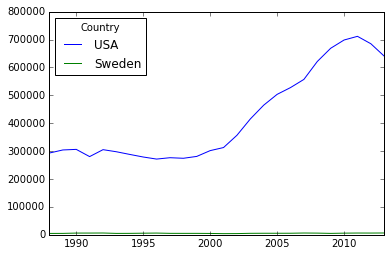

In [144]:
subframe.T.plot() 

The military expenditure is so less compared to the US that it is not visible. We will change the scale to a log scale

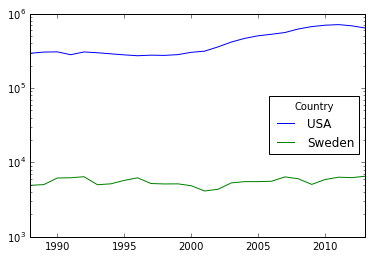

In [145]:
subframe.T.plot(logy = True) 